# 构建自己的模型，卷 激 卷 激  扁平化之后 两个全连接层得到10分类的任务模型

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt

# 先搭建一个简单的mnist数据集10分类任务
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,3,kernel_size=3,padding=2)
    self.conv2 = nn.Conv2d(3,32,kernel_size = 3,stride=2,padding=1)
    # self.conv3 = nn.Conv2d(6,12,kernel_size = 3,stride = 2,padding=1)
    self.flatten = nn.Flatten()
    self.dense = nn.Linear(7200,100)
    self.dense1 = nn.Linear(100,10)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()
  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)

    x = self.conv2(x)
    x = self.relu(x)

    # x = self.conv3(x)
    # x = self.relu(x)
    # print (x.shape)
    x = self.flatten(x)
    # print (x.shape)
    x = self.dense(x)
    output = self.dense1(x)
    
    return output

# 设定一些训练参数， 加载训练数据集

In [25]:
batch_size = 12
learning_rate = 1e-4
epoch = 5
train_loader = torch.utils.data.DataLoader(          
    datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            ])),
        batch_size=batch_size, shuffle=True)
# 定义模型及其优化器
device = 'cuda' if torch.cuda.is_available() else 'cpu'
loss_fn = nn.CrossEntropyLoss()
# 该损失函数包含了softmax与交叉熵，并且其接受的target非one-hot，函数内部会将其转化为one-hot
# 毫无疑问，这个肯定得是全局变量啊啊啊！！！没想到这里又栽了个跟头
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate,momentum=0.9)     # 随机梯度下降SGD优化算法

# 开始训练  加载输入数据 ，模型产生预测结果， 计算损失， 相关参数的梯度重新置零，反向传播计算得到每个参数的梯度值

In [26]:
# 训练集与测试集比为6：1
from tqdm import tqdm
import time
start = time.time()
for j in range(epoch):
  if j==1:
    print ('开始炼丹，训练集达到12000张训练集，batch_size设置为12')
  print ('epoch为',j+1,'模型冲冲冲！！！')
  for i,(data,target) in enumerate(train_loader): # XXX_loader 里面包含 
    # 如果使用GPU那要将模型以及输入输出改成GPU，因为后序是根据这个进行运算的
    data = data.to(device)
    target = target.to(device)
    # print (data.shape)
    predict = model(data)
    loss = loss_fn(predict,target)
    model.zero_grad()     #相关参数的梯度重新置零
    loss.backward()       # 反向传播计算得到每个参数的梯度值
    # 以下实现为什么不行，目前还不明白
    # with torch.no_grad():
    #   for param in model.parameters():
    #     param -= learning_rate * param.grad
    optimizer.step()    #最后通过梯度下降执行一步参数更新
    # 参数优化可以使用上述最原始的，也能自己定义优化器，不错哟
    if i%1000 == 0:
      print ('参数更新',i,'次,we can get loss equal ',loss)
    
end = time.time()
print ('使用设备：{};炼丹结束，共花费{}分钟'.format(device,(end-start)/60))
print ('靶机模型已训练成功，手写数字10分类任务，CW攻击拉开序幕')

epoch为 1 模型冲冲冲！！！
参数更新 0 次,we can get loss equal  tensor(2.2879, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 1000 次,we can get loss equal  tensor(2.1696, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 2000 次,we can get loss equal  tensor(0.6667, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 3000 次,we can get loss equal  tensor(0.2289, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 4000 次,we can get loss equal  tensor(0.3669, device='cuda:0', grad_fn=<NllLossBackward0>)
开始炼丹，训练集达到12000张训练集，batch_size设置为12
epoch为 2 模型冲冲冲！！！
参数更新 0 次,we can get loss equal  tensor(0.0574, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 1000 次,we can get loss equal  tensor(0.3466, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 2000 次,we can get loss equal  tensor(0.3618, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 3000 次,we can get loss equal  tensor(0.3014, device='cuda:0', grad_fn=<NllLossBackward0>)
参数更新 4000 次,we can get loss equal  tensor(0.4480, device='cuda:0', grad_fn=<Nll

# 测试训练出来的模型，样本手写数字10分类

d:\ANACONDA\envs\newtorch\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


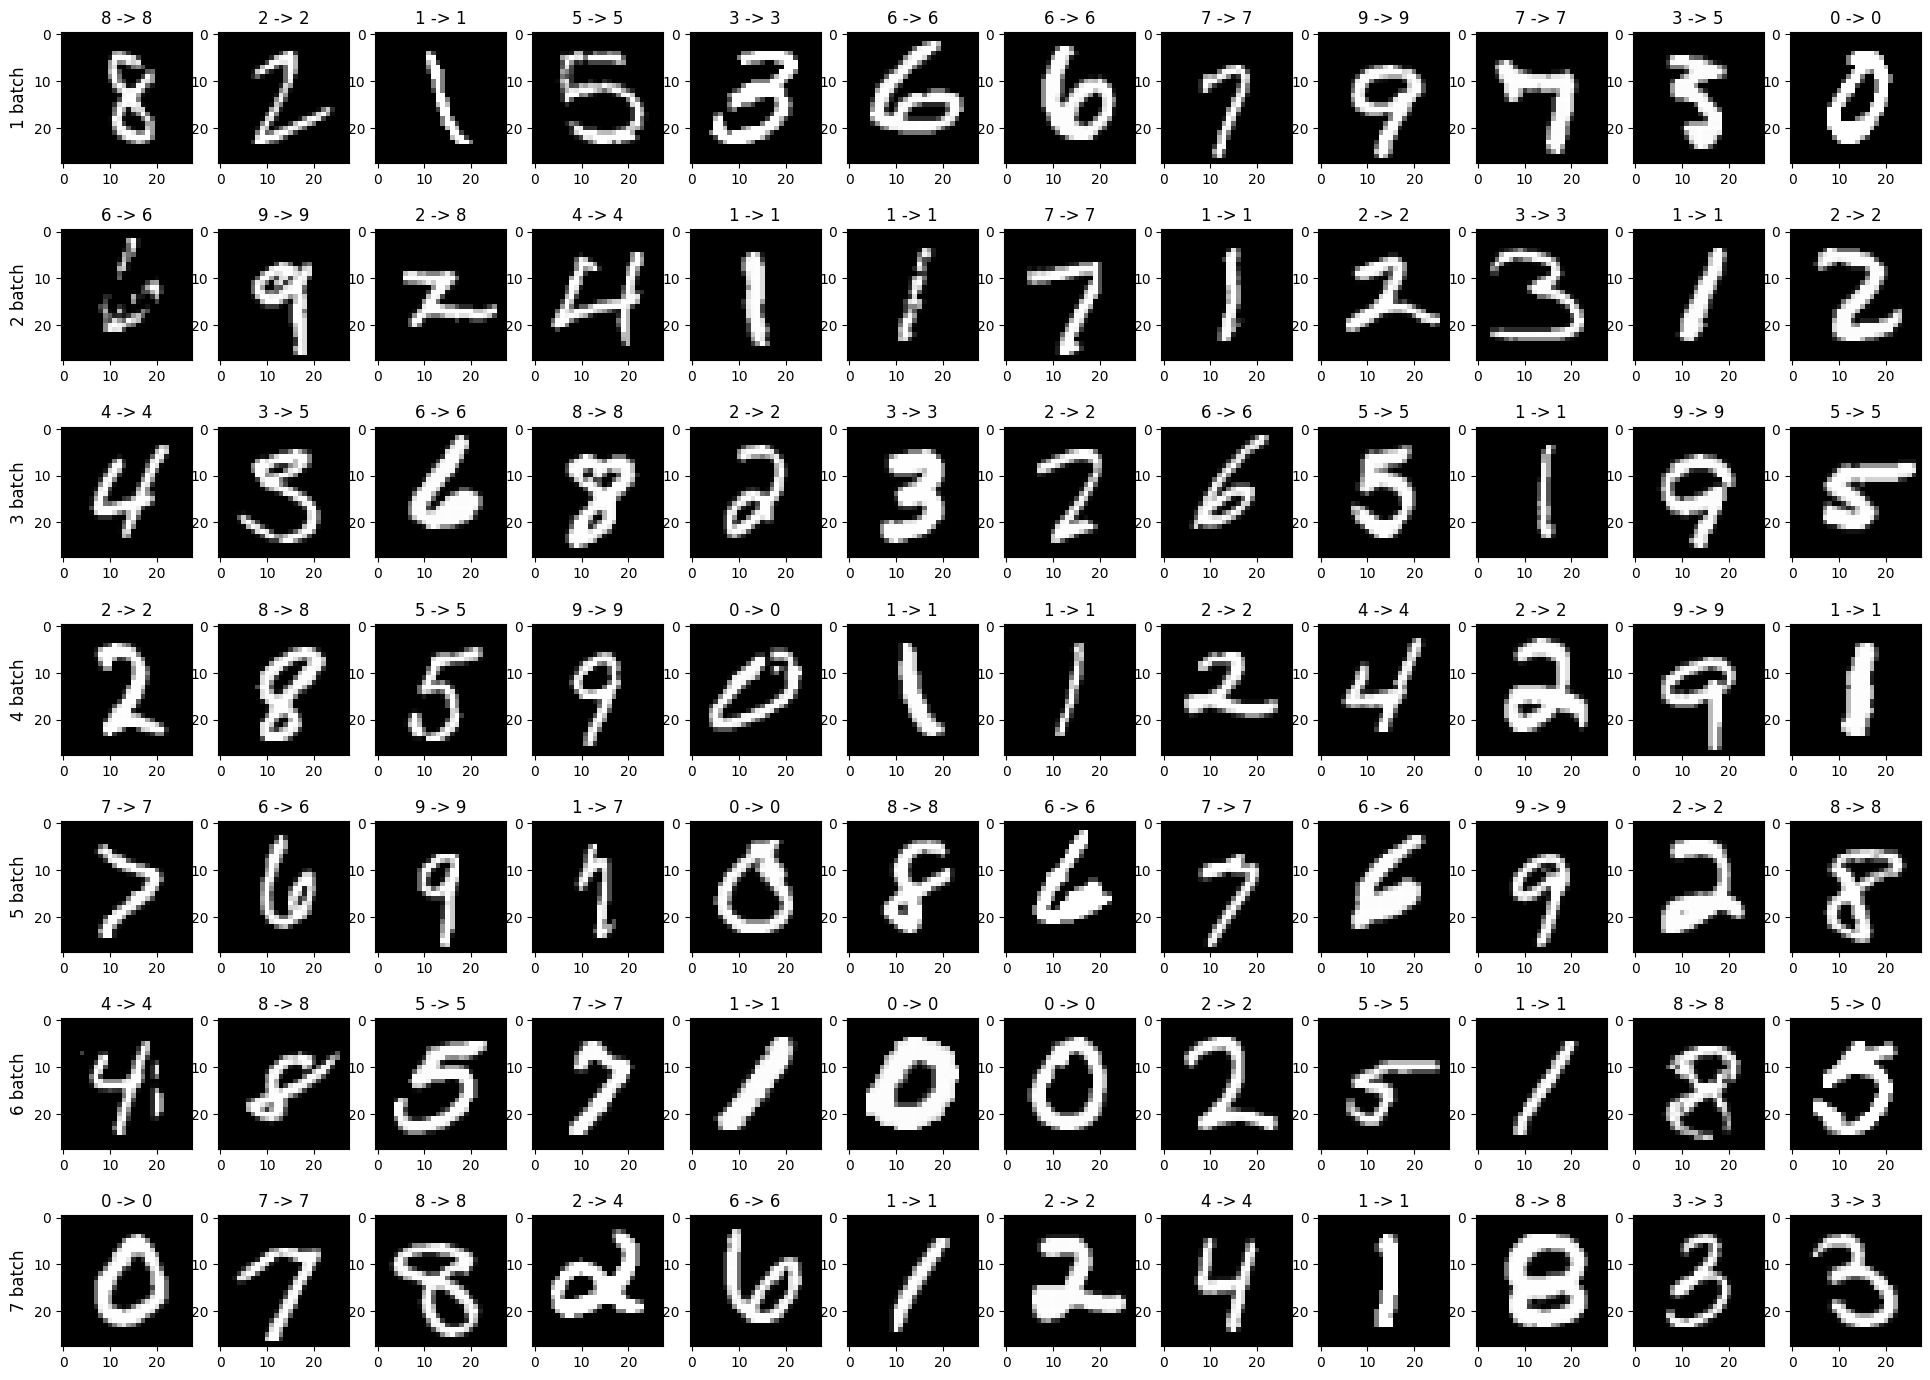

In [27]:
# 测试直观性能
import matplotlib.pyplot as plt
iter_times = 7
plt.figure(figsize=(24,2.5*iter_times))
cnt = 0
for i,(data,target) in enumerate(test_loader):
  for j in range(batch_size):
    cnt += 1  # 一行的计数器
    plt.subplot(iter_times,batch_size,cnt)
    if j == 0:
      plt.ylabel('{} batch'.format(i+1),fontsize=12)
    # plt.xticks([], [])
    # plt.yticks([], [])
    # 使用plt.yticks([], []),目的是使得图片没有坐标的数值，就是直接一张照片
    plt.imshow(data[j,:,:,:].reshape(28,28),cmap='gray')

    predict = model(data.to(device))
    m = nn.Softmax()
    soft_output = m(predict)
    plt.title('{} -> {}'.format(target[j],soft_output.argmax(axis=1)[j]))
  if (i >= iter_times-1):
    break

# CW攻击

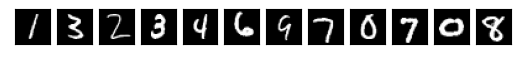

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

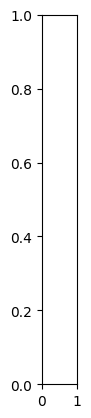

In [41]:
# CW attack
# 数据大小范围
from torch import tensor
from torch.functional import Tensor

img = None
target = None
for i,(img,target) in enumerate(test_loader):  # ？？？？ 用for取第一个测试样本
  if i == 0:
    img = img
    target = target
    break

for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(img[i,:,:,:].reshape(28,28).numpy(),cmap='gray')
  plt.xticks([])
  plt.yticks([])

plt.show()

learning_rate1 = 0.03
update_times = 5000
# 选择攻击的类别，即将样本错误的分成哪一类
attack_cat = 3
# 模型的原始样本与对抗样本l2损失值与错误分类的损失值
k = 1
c = 1
# 以下参数按照原始数据的处理后的范围而定，由于输入模型的范围是0--1，故设置以下参数
box_min = 0
box_max = 1
box_mul = (box_max-box_min)/2
box_plus = (box_min+box_max)/2
modifier = torch.zeros_like(img,requires_grad=True)
l2dist = None
loss2cat = None
loss = None
l2dist_list = []
loss2cat_list = []
loss_list = []



for j in range(update_times):
  new_img = torch.tanh(img+modifier)*box_mul+box_plus
  l2dist = torch.sum(torch.square(new_img - img))  #新照片和原始照片的l2距离（差的平方）,结果是一个数
  # l2dist = torch.sum(torch.square(new_img - torch.tanh(img)*box_mul+box_plus))
  output = model(new_img.to(device))            #把新样本输入到攻击模型当中

  # 设定有目标攻击,使得模型误判成第三个
  cat_onehot = torch.zeros_like(output)
  cat_onehot[:,attack_cat]=1      #此时[0,0,0,1,0...]
  others = torch.max((1-cat_onehot)*output,axis=1).values  # 除了目标类型的最大值概率
  real = torch.sum(output*cat_onehot,axis=1)            # 当前目标类型的概率
  loss2cat =torch.sum(torch.maximum(torch.zeros_like(others)-c,others - real))
  loss = l2dist+k*loss2cat

  if j == 0 :
    # print("new_img{}".format(new_img))
    print("l2dist={}".format(l2dist))
    # print("output={}".format(output))
    print("cat_onehot={}".format(cat_onehot))
    print("others={}".format(others))
    print("real={}".format(real))
    print("loss2cat={}".format(loss2cat))
    print("loss={}".format(loss))
    print("==========迭代--------------")
    
    

  l2dist_list.append(l2dist)
  loss2cat_list.append(loss2cat)
  loss_list.append(loss)
  # is not 表示是否两者为同一个对象，有相同的地址。用！=也行
  if modifier.grad is not None:
    modifier.grad.zero_()
  # 每次更新之前将modifier中的梯度至为零
  # 如果使用optimizero内部就会自动判断是否梯度为零，不用if这个判断
  loss.backward()
  # print (j)
  # https://www.cnblogs.com/dong973711/p/14140309.html
  # 不明白为什么这样使用，转至以上博客
  # 截断计算图，并重新赋予可求导属性
  # 如果是使用optimizer就可简化这步
  modifier = (modifier - modifier.grad*learning_rate1).detach().requires_grad_()



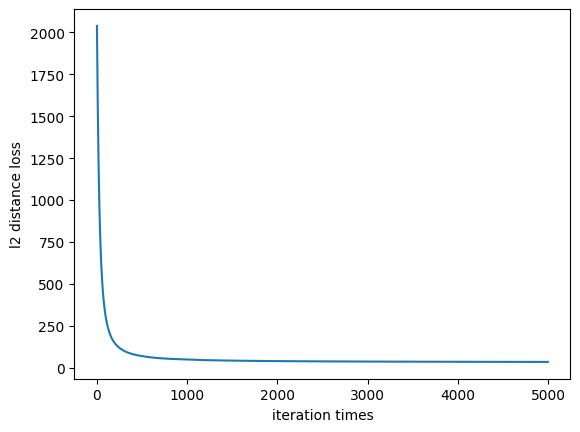

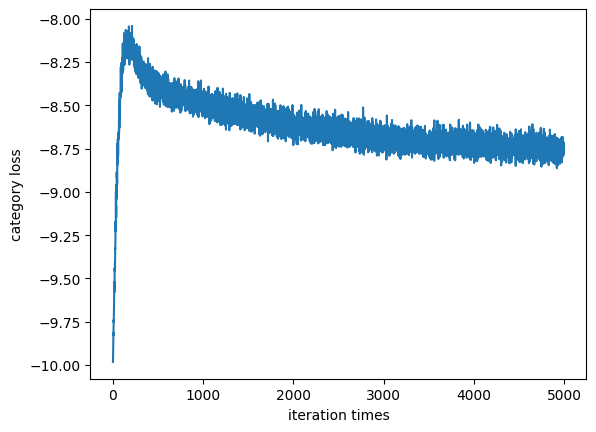

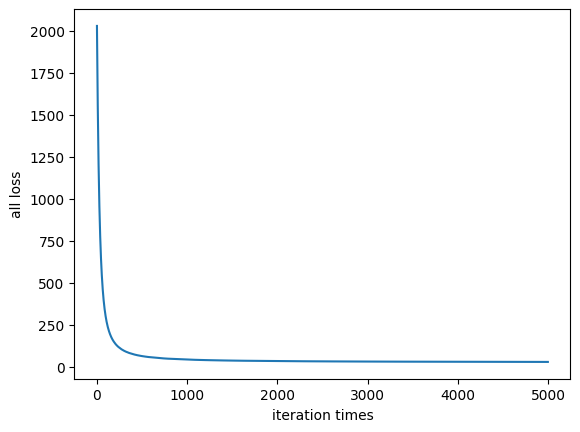

tensor(36.6478, grad_fn=<SumBackward0>) tensor(-8.7795, device='cuda:0', grad_fn=<SumBackward0>) tensor(27.8683, device='cuda:0', grad_fn=<AddBackward0>)


In [7]:
# print (modifier) 
def plot_loss(loss,loss_name):
  plt.figure()
  plt.plot([i for i in range(len(loss))],loss)
  # plt.yticks(np.arange(1,50,0.5))
  plt.xlabel('iteration times')
  plt.ylabel(loss_name)
  plt.show()
l2dist_list = torch.Tensor(l2dist_list)
l2dist_list = l2dist_list.detach().numpy()

loss2cat_list = torch.Tensor(loss2cat_list)
loss2cat_list = loss2cat_list.detach().numpy()
plot_loss(l2dist_list,'l2 distance loss')

plot_loss(loss2cat_list,'category loss')

loss_list = torch.Tensor(loss_list)
loss_list = loss_list.detach().numpy()
plot_loss(loss_list,'all loss')
new_img = torch.tanh(img+modifier)*box_mul+box_plus
print (l2dist,loss2cat,loss)

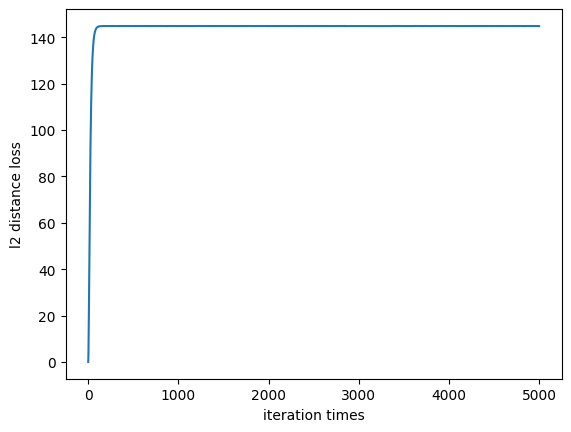

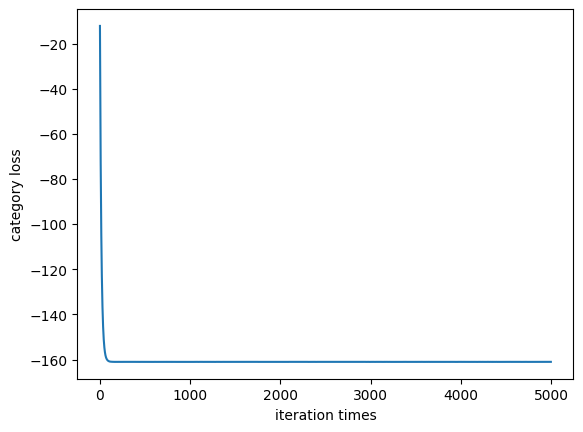

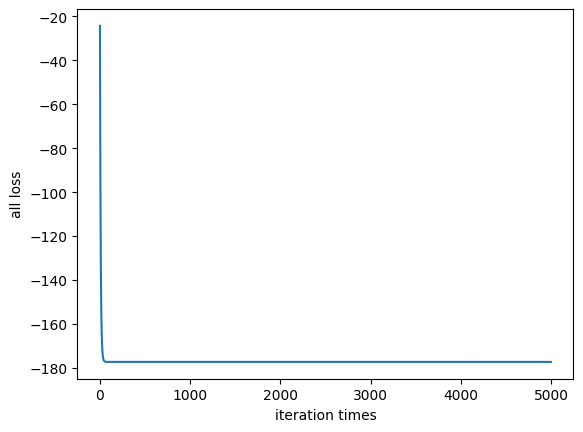

tensor(144.7905, grad_fn=<SumBackward0>) tensor(-161.0298, device='cuda:0', grad_fn=<SumBackward0>) tensor(-177.2692, device='cuda:0', grad_fn=<AddBackward0>)


In [8]:
# My Attack
learning_rate1 = 0.03
update_times = 5000
# 选择攻击的类别，即将样本错误的分成哪一类
attack_cat = 3
# 模型的原始样本与对抗样本l2损失值与错误分类的损失值
k = 2
# 以下参数按照原始数据的处理后的范围而定，由于输入模型的范围是0--1，故设置以下参数
box_min = 0
box_max = 1
box_mul = (box_max-box_min)/2
box_plus = (box_min+box_max)/2
modifier = torch.zeros_like(img,requires_grad=True)
l2dist = None
loss2cat = None
loss = None
l2dist_list = []
loss2cat_list = []
loss_list = []
for j in range(update_times):
  new_img = img+modifier
  l2dist = torch.sum(torch.square(new_img - img))
  # l2dist = torch.sum(torch.square(new_img - torch.tanh(img)*box_mul+box_plus))
  output = model(new_img.to(device))
  # 使用softmax层,使用了这个层以后，效果就极差
  # output = nn.Softmax()(output)

  # 设定有目标攻击,使得模型误判成第三个
  cat_onehot = torch.zeros_like(output)
  cat_onehot[:,attack_cat]=1
  # others = torch.max((1-cat_onehot)*output,axis=1).values
  real = torch.sum(output*cat_onehot,axis=1)
  # loss2cat =torch.sum(others - real)
  loss2cat =torch.sum(- real)
  loss = l2dist+k*loss2cat

  l2dist_list.append(l2dist)
  loss2cat_list.append(loss2cat)
  loss_list.append(loss)
  # is not 表示是否两者为同一个对象，有相同的地址。用！=也行
  if modifier.grad is not None:
    modifier.grad.zero_()
  # 每次更新之前将modifier中的梯度至为零
  # 如果使用optimizero内部就会自动判断是否梯度为零，不用if这个判断
  loss.backward()
  # print (j)
  # https://www.cnblogs.com/dong973711/p/14140309.html
  # 不明白为什么这样使用，转至以上博客
  # 截断计算图，并重新赋予可求导属性
  # 如果是使用optimizer就可简化这步
  modifier = (modifier - modifier.grad*learning_rate1).detach().requires_grad_()
def plot_loss(loss,loss_name):
  plt.figure()
  plt.plot([i for i in range(len(loss))],loss)
  # plt.yticks(np.arange(1,50,0.5))
  plt.xlabel('iteration times')
  plt.ylabel(loss_name)
  plt.show()
l2dist_list = torch.Tensor(l2dist_list)
l2dist_list = l2dist_list.detach().numpy()
plot_loss(l2dist_list,'l2 distance loss')

loss2cat_list = torch.Tensor(loss2cat_list)
loss2cat_list = loss2cat_list.detach().numpy()
plot_loss(loss2cat_list,'category loss')

loss_list = torch.Tensor(loss_list)
loss_list = loss_list.detach().numpy()
plot_loss(loss_list,'all loss')
print (l2dist,loss2cat,loss)

d:\ANACONDA\envs\newtorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.
d:\ANACONDA\envs\newtorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == "__main__":


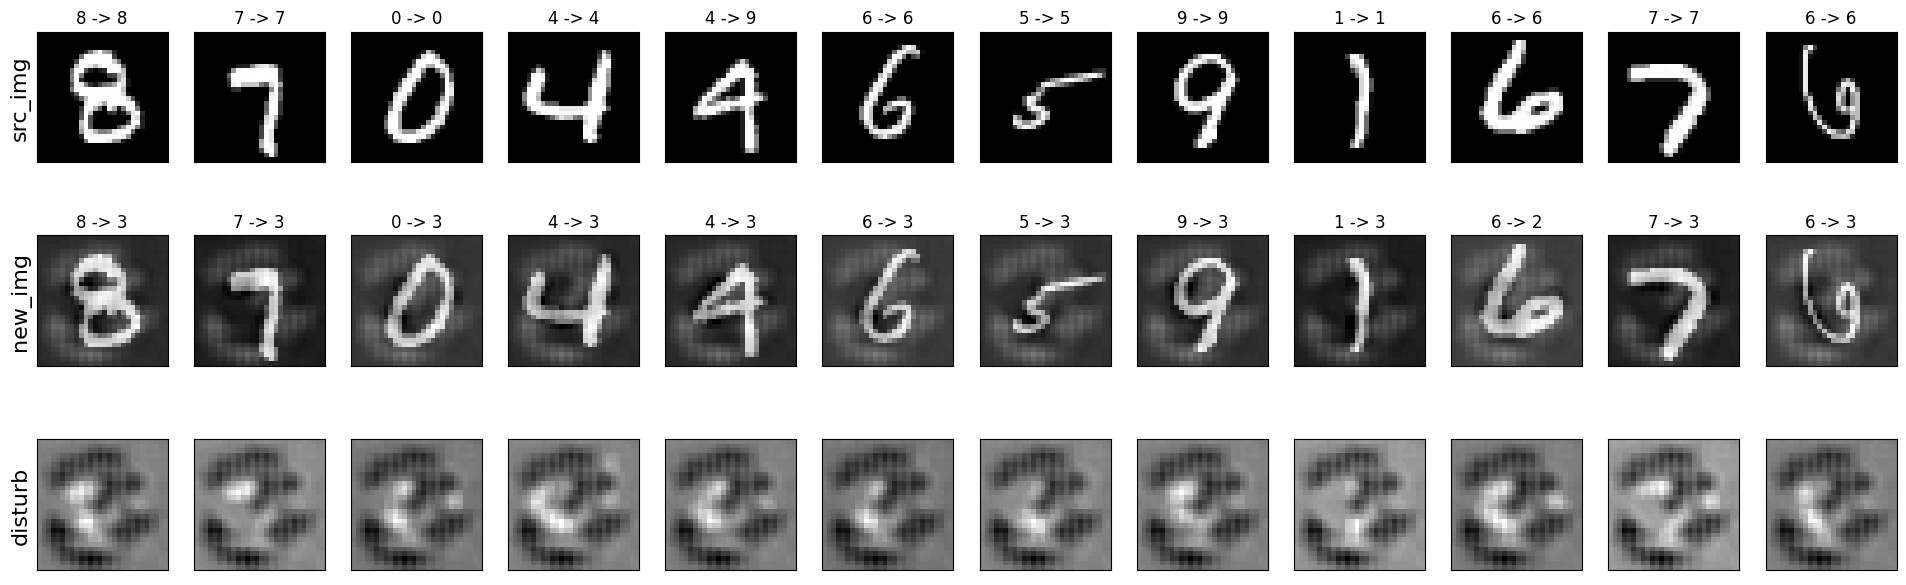

In [9]:
def predict_cat(img_batch,new_img_batch):
  predict = model(img.to(device))
  m = nn.Softmax()
  soft_output = m(predict)
  img_predict = soft_output.argmax(axis=1)
  
  new_predict = model(new_img.to(device))
  m = nn.Softmax()
  new_soft_output = m(new_predict)
  new_img_predict = new_soft_output.argmax(axis=1)
  return img_predict,new_img_predict

# CW攻击直观展示
plt.figure(figsize=(24,2.5*3))
cnt = 0
img_predict,new_img_predict = predict_cat(img,new_img)
for i in range(batch_size):
  cnt+=1
  plt.subplot(3,batch_size,cnt)
  plt.imshow(img[i,:,:,:].reshape(28,28).numpy(),cmap='gray')
  plt.title('{} -> {}'.format(target[i],img_predict[i]))
  plt.xticks([])
  plt.yticks([])
  if i == 0:
    plt.ylabel('src_img',fontsize=16)
  plt.subplot(3,batch_size,cnt+batch_size)
  plt.imshow(new_img[i,:,:,:].reshape(28,28).detach().numpy(),cmap='gray')
  plt.title('{} -> {}'.format(target[i],new_img_predict[i]))
  plt.xticks([])
  plt.yticks([])
  if i == 0:
    plt.ylabel('new_img',fontsize=16)
  plt.subplot(3,batch_size,cnt+batch_size*2)
  # 如果像素点无差，应使得值为1，保持黑色底色
  plt.imshow(1-(new_img[i,:,:,:].reshape(28,28).detach().numpy()-img[i,:,:,:].reshape(28,28).numpy()),cmap='gray')
  if i == 0:
    plt.ylabel('disturb',fontsize=16)
  plt.xticks([])
  plt.yticks([])
plt.show()

In [23]:
test=torch.Tensor([1,2,3,4,5])
print(test)
test1 = torch.zeros_like(test)
lens = 3
# test1[:,lens] = 1
print("测试{}".format(test1))

tensor([1., 2., 3., 4., 5.])
测试tensor([0., 0., 0., 0., 0.])
